# 2022 NZMSA Data Science Submission.

In [2]:
!pip install neuralprophet


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import seaborn as sns
from neuralprophet import NeuralProphet

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [5]:
# Read and show dataset
ds = pd.read_csv("weather-data.csv")
ds.head()


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [6]:
ds.columns

Index([' station', 'valid', 'tmpc', 'dwpc', 'relh', 'sknt', 'gust',
       'peak_wind_drct'],
      dtype='object')

In [8]:
# Rename columns to more readable names 
ds.columns.values[0:8] = ["Station", "Date and Time", "Temp of Env (°C)", "Temp of dew point (°C)", 
"Relative Humidity of Env (%)", "Wind Speed (knots)", "Wind Gust (knots)", "Peak Wind Direction"]

# Get general statistics of the dataset
ds.describe() 

,Temp of Env (°C),Temp of dew point (°C),Relative Humidity of Env (%),Wind Speed (knots),Wind Gust (knots),Peak Wind Direction
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [7]:
# Check that there are no null-values and observe their types
ds.info()

ds.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


 station           object
valid              object
tmpc              float64
dwpc              float64
relh              float64
sknt              float64
gust              float64
peak_wind_drct    float64
dtype: object

In [11]:
# Convert 'Date and Time' column to datetime type
# ds['Date and Time'] = pd.to_datetime(ds['Date and Time'])
# ds.dtypes

ds['valid'] = pd.to_datetime(ds['valid'])
ds.dtypes

 station                  object
valid             datetime64[ns]
tmpc                     float64
dwpc                     float64
relh                     float64
sknt                     float64
gust                     float64
peak_wind_drct           float64
value             datetime64[ns]
dtype: object

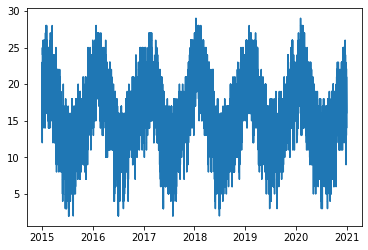

In [12]:
plt.plot(ds['valid'], ds['tmpc'])


In [16]:
data = ds[['valid', 'tmpc']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\rauna\AppData\Local\Temp\ipykernel_2092\2360333847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,2015-01-01 00:00:00,21.0
1,2015-01-01 00:30:00,21.0
2,2015-01-01 01:00:00,21.0
3,2015-01-01 01:30:00,21.0
4,2015-01-01 02:00:00,21.0


In [19]:
m = NeuralProphet()
model = m.fit(data)

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.388% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 30T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
WARNING - (py.warnings._showwarnmsg) - C:\Users\rauna\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:95: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  self.inputs[key] = torch.from_numpy(data).type(inputs_dtype[key])



RuntimeError: Numpy is not available

In [6]:
# we can see that the last column in the dataset ('Peak Wind Direction') has 0 values
# therefore we will exclude this column going forward
dataset = dataset.drop(['Peak Wind Direction'], axis=1)

<AxesSubplot:>

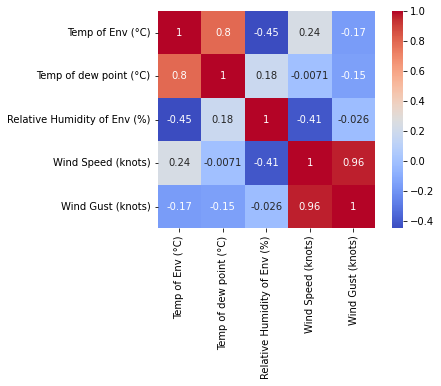

In [7]:
# Ccorrelation plot of dataset 
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to the 0 value indicates the plot of a(x) and b(x) has no noticeable pattern.
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, square=True)


<function matplotlib.pyplot.show(close=None, block=None)>

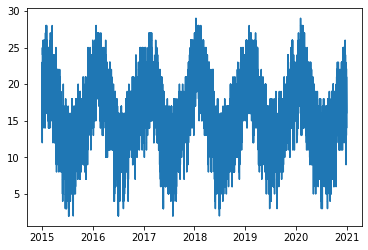

In [8]:
# plot change in temp of environment over time as part of EDA 
plt.plot(dataset['Date and Time'], dataset['Temp of Env (°C)'])
plt.show

C:\Users\rauna\AppData\Local\Temp\ipykernel_15140\1516040884.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


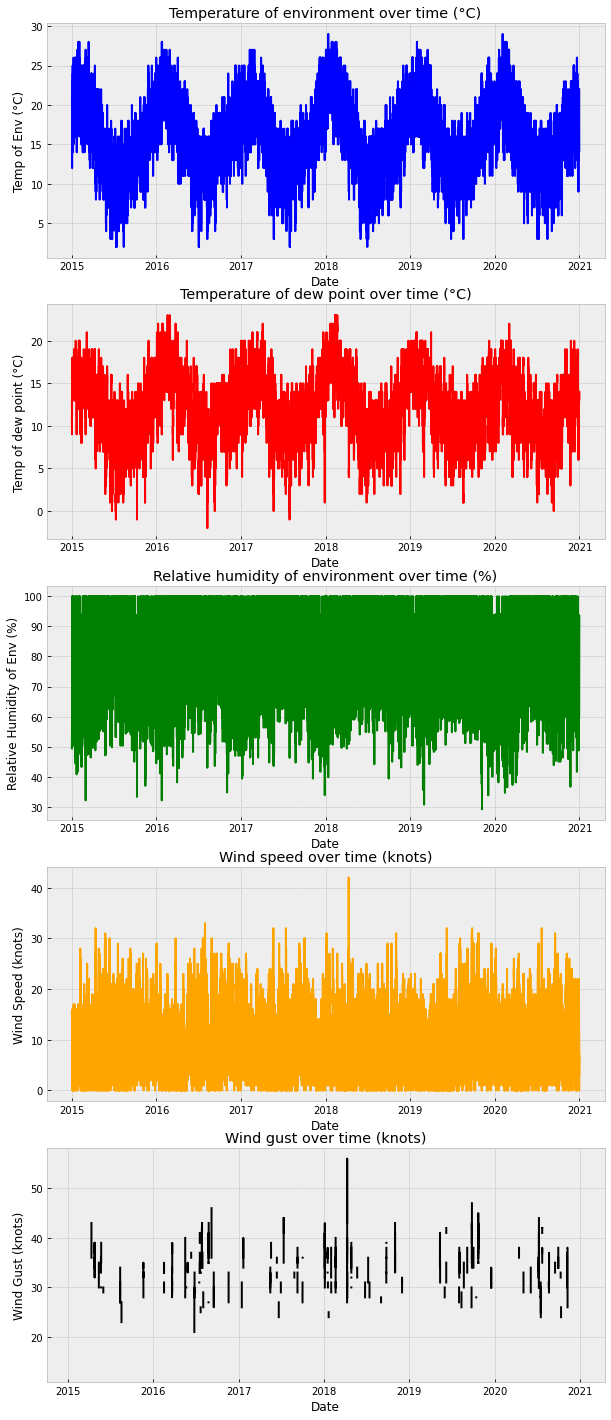

In [9]:
# multigraph to visual change of any numerical sections over time as part of EDA 
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

ax1.plot(dataset["Date and Time"], dataset["Temp of Env (°C)"], color="blue")
ax1.set_title("Temperature of environment over time (°C)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Temp of Env (°C)")

ax2.plot(dataset["Date and Time"], dataset["Temp of dew point (°C)"], color="red")
ax2.set_title("Temperature of dew point over time (°C)")
ax2.set_xlabel("Date")
ax2.set_ylabel("Temp of dew point (°C)")

ax3.plot(dataset["Date and Time"], dataset["Relative Humidity of Env (%)"], color="green")
ax3.set_title("Relative humidity of environment over time (%)")
ax3.set_xlabel("Date")
ax3.set_ylabel("Relative Humidity of Env (%)")

ax4.plot(dataset["Date and Time"], dataset["Wind Speed (knots)"], color="orange")
ax4.set_title("Wind speed over time (knots)")
ax4.set_xlabel("Date")
ax4.set_ylabel("Wind Speed (knots)")

ax5.plot(dataset["Date and Time"], dataset["Wind Gust (knots)"], color="black")
ax5.set_title("Wind gust over time (knots)")
ax5.set_xlabel("Date")
ax5.set_ylabel("Wind Gust (knots)")


fig.set_size_inches(10,25)
fig.show()

## comments: 

# Data Processing

In [10]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

# Data Modelling

We want to predict the weather in the future, specifically the temperature of the environment. To do this, I have chosen to utilise the Neural Prophet package to plot future data 

In [11]:
!pip install numpy


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install neuralprophet[live]


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from neuralprophet import NeuralProphet
import numpy as np

In [14]:
# neural prophet expects only 2 columns of data passed in: 'ds' (representing the dates), and 'y' (represents the value we are trying to predict - Temperature of Env)
# hence we create a new dataset using only those columns and renaming them as required

npdataset = dataset[["Date and Time", "Temp of Env (°C)"]]
npdataset.dropna(inplace=True)
npdataset.columns = ['ds', 'y']

npdataset.head(100)

WARNING - (py.warnings._showwarnmsg) - C:\Users\rauna\AppData\Local\Temp\ipykernel_15140\3820753846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npdataset.dropna(inplace=True)



,ds,y
0,2015-01-01 00:00:00,21.0
1,2015-01-01 00:30:00,21.0
2,2015-01-01 01:00:00,21.0
3,2015-01-01 01:30:00,21.0
4,2015-01-01 02:00:00,21.0
...,...,...
95,2015-01-02 23:30:00,20.0
96,2015-01-03 00:00:00,20.0
97,2015-01-03 00:30:00,20.0
98,2015-01-03 01:00:00,20.0


In [15]:
# here we create a new instance of Neural Prophet and train it 

# npmodel = NeuralProphet()
# metrics = npmodel.fit(npdataset)

# m = NeuralProphet()
# metrics = m.fit(npdataset)

m = NeuralProphet(
    n_lags=12,
    changepoints_range=0.95,
    n_changepoints=30,
    weekly_seasonality=False,
)
metrics = m.fit(npdataset)


INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.388% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 30T
INFO - (NP.forecaster.__handle_missing_data) - 1490 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 1490 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
WARNING - (py.warnings._showwarnmsg) - C:\Users\rauna\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\time_dataset.py:95: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  self.inputs[key] = torch.from_numpy(data).type(inputs_dtype[key])



RuntimeError: Numpy is not available

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.